# Consumo de Cerveja - São Paulo
___

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Darkgrid
sns.set_style('darkgrid')

# Removendo warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset

### Descrição

A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Ela é perfeita para quase todas as situações, desde happy hour até grandes festas de casamento. Se você só pensar nisso, você já sente vontade de tomar uma cerveja, você não está sozinho.

Pensando nisso, o objetivo deste projeto é criar um modelo baseado em <b>Machine Learning</b> capaz de estimar o consumo de cerveja de acordo com algumas condições. A técnica escolhida para elaboração do modelo foi a de <b>Regressão Linear</b>.

### Fonte

O dataset utilidado foi retirado da plataforma Kaggle e pode ser baixado [aqui](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo).

### Dicionário do Dataset

+ <b> data </b>: Data da instância (AAAA-MM-DD)
+ <b> temp_media </b> : Temperatura Média (°C)
+ <b> temp_min </b> : Temperatura Minima do Dia (°C)
+ <b> temp_max </b> : Temperatura Máxima do Dia (°C)
+ <b> chuva </b> : Precipitação (mm)
+ <b> fds </b> : Se é ou não Fim de Semana (1 = Sim, 0 = Não)
+ <b> consumo </b> : Consumo de Cerveja (Litros)

### Leitura e Higienização dos Dados

In [2]:
# Leitura dos dados
dados = pd.read_csv("../Dados/Consumo_cerveja.csv", sep=';')
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


# Análise Descritiva dos Dados
---

## Estatísticas Descritivas

In [3]:
# Tabela com as estatísticas descritivas dos dados
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de Correlação

Analisando a Matriz de correlação abaixo, nota-se que o consumo:

+ tende a crescer conforme a temperatura aumenta, pois o coeficiente de correlação de 'consumo x temp_media' e 'consumo x temp_max' é positivo e maior que 0,5.
+ diminui em dias chuvosos, pois o coeficiente de correlação de 'consumo x chuva' é negativo.
+ aumenta nos finais de semana.

In [4]:
# Matriz contendo o coeficiente de correlação de Pearson
dados.corr(method = 'pearson')

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


# Comportamento da Variável Dependente (Y)
---

## Plotando a Variável Dependente (Consumo)

Avaliando o gráfico de consumo ao longo do ano, pode-se perceber que o consumo decai até o meio do ano e posteriormente volta a subir. É bem provável que esse decaimento se deve ao inverno, pois na matriz de correlação observamos que o consumo apresenta uma correlação inversa à temperatura. 

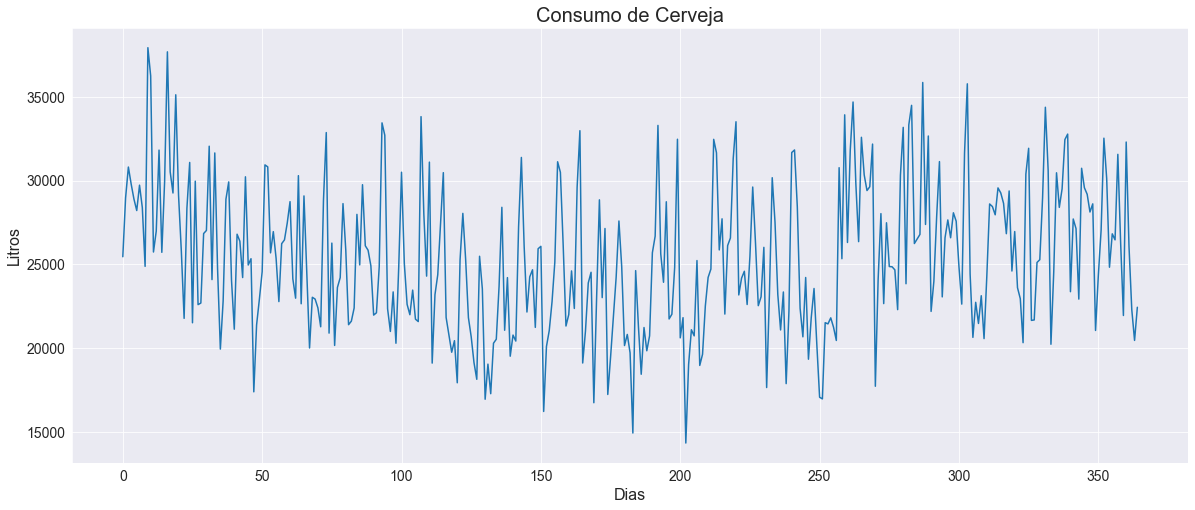

In [5]:
# Série temporal do consumo ao longo do ano
fig, ax = plt.subplots(figsize=(20, 8))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Dias', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

## Boxplot da Variável Dependente (Consumo)

Avaliando o boxplot abaixo, pode-se perceber que a distribuição do consumo é bem comportada e a mediana é próxima de 50% do valor da escala. Além disso, nota-se que não há a presença de outlier.

Text(0, 0.5, 'Litros')

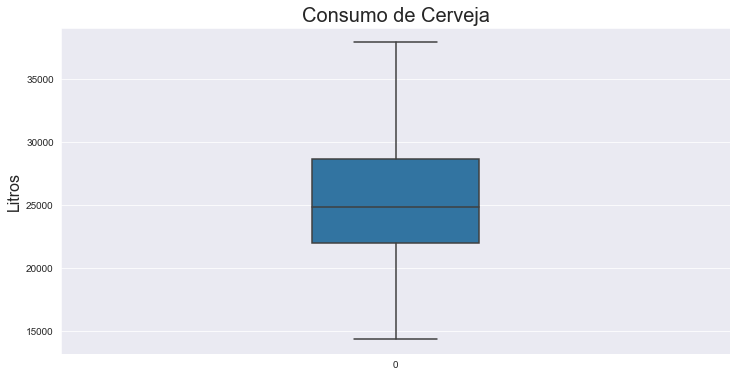

In [6]:
# Boxplot do consumo
ax = sns.boxplot(data=dados['consumo'], width = 0.25)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)

Analisando os boxplots abaixo, fica nítido que o consumo de cerveja aumenta consideravelmente nos finais de semana. Além disso, pode-se perceber que no boxplot dos dias úteis da semana existem possíveis outliers. Provavelmente, eles são decorrentes de feriados durante a semana.

Text(0, 0.5, 'Litros')

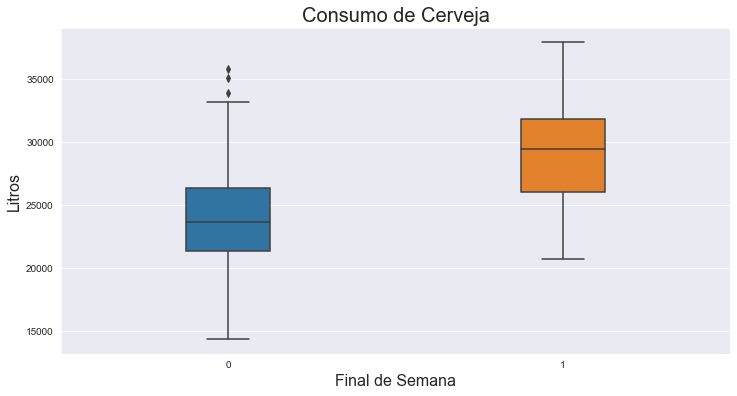

In [7]:
# Boxplot do consumo
ax = sns.boxplot(data=dados, x='fds', y='consumo', width = 0.25)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Final de Semana', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)

# Distribuição de Frequência
---

Para aplicar a regressão linear, é interessante avaliar se a variável dependente apresenta uma distribuição próxima da distribuição normal. Analisando o histograma abaixo, constata-se que a variável 'consumo' apresenta uma distribuição proxima da normal, apresentando uma pequena deformidade.

Text(0.5, 0, 'Consumo (Litros)')

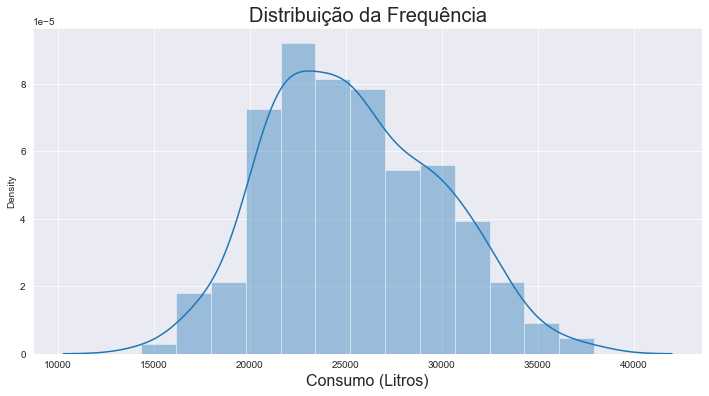

In [8]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Frequência', fontsize=20)
ax.set_xlabel('Consumo (Litros)', fontsize=16)

# Variável Dependente x Variável Explicativa
---

Analisando os pairplots abaixo, nota-se novamente que:

+ A variável temp_max apresenta uma dispersão menor em relação ao consumo comparado as variáveis temp_media e temp_min. Assim, ela é uma forte candidata a ser utilizada no modelo de regressão linear.
+ Aparentemente o consumo tende a cair quanto maior a quantidade de mm de chuva do dia. Essa variável possui muitas instâncias com 0 mm no dia, sendo necessário tomar certo cuidado.
+ O consumo de cerveja apresenta uma dispersão menor nos fins de semana, apresentando um consumo mínimo bem maior do que nos dias úteis da semana.

Text(0.5, 1.1, 'Dispersão entre as variáveis')

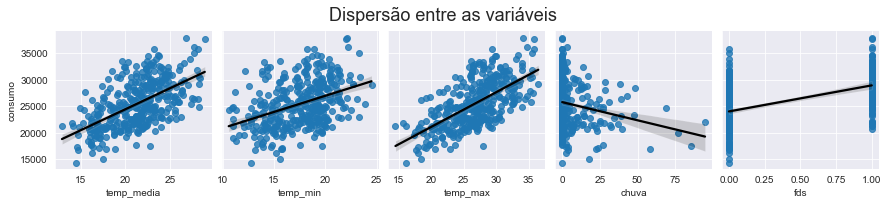

In [9]:
# Gerando o pairplot do dataset
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'], kind='reg', plot_kws={'line_kws':{'color':'black'}})
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.1)

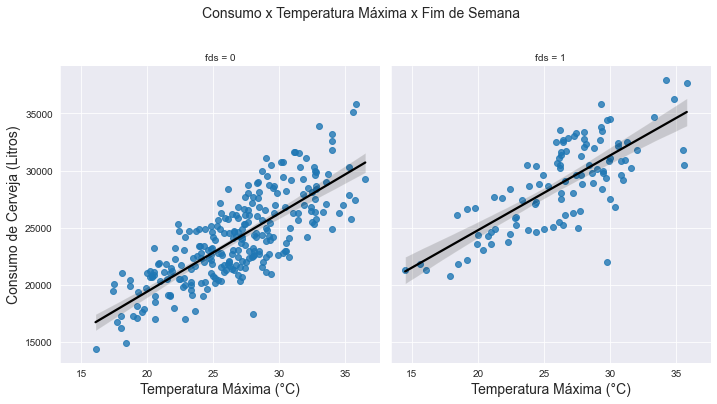

In [10]:
# Lmplot
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, col='fds', line_kws={'color':'black'})
ax.fig.suptitle('Consumo x Temperatura Máxima x Fim de Semana', fontsize= 14, y=1.1)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize= 14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize= 14)
ax

# Criando o Modelo de Regressão Linear
---

## Dividindo o dataset (hold-out)

O dataset será particionado de acordo com a técnica de treino e teste (hold-out). A proporção do particionamento será de 70% para treino e 30% para teste. As variáveis explicativas escolhidas serão temp_max, chuva, fds.

In [11]:
# Importando o splitter 
from sklearn.model_selection import train_test_split

# Separando a variável dependente (consumo)
y = dados['consumo']

# Separando as variáveis explicativas
X = pd.DataFrame(data=dados, columns=['temp_max', 'chuva', 'fds'])

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

## Treinamento

O Coeficiente de Determinação (R²) obtido no processo de treinamento foi de 0.73 indicando que o modelo consegue explicar 73% da variação da variável dependente, no caso, a variável consumo. É um valor relativamente satisfatório, já que o número de instancias do dataset é pequeno.

In [12]:
# Importando o modelo e as métricas
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Instanciando o modelo
modelo = LinearRegression()

# Treinamento
modelo.fit(X_train, y_train)

# Coeficiente de Determinação (R²)
modelo.score(X_train, y_train).round(2)

0.72

## Teste

O Coeficiente de Determinação (R²) do processo de teste foi de 0.7, que é um valor bem próximo do coeficiente de determinação do processo de treino.

In [13]:
# Testando o modelo com os dados de teste
y_pred = modelo.predict(X_test)

metrics.r2_score(y_test, y_pred).round(2)

0.72

# Previsões Pontuais
---

In [14]:
# Previsão Pontual utilizando o Modelo (38.8 °C, 0 mm, não-fds)
modelo.predict([[38.8, 0.0, 0]])[0]

31959.34810610641

# Interpretação dos Coeficientes Estimados
---

## Intercepto

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [15]:
# Obtendo o intercepto
modelo.intercept_

7686.779971856216

## Coeficientes de Regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [16]:
# Obtendo os coeficientes
modelo.coef_

array([ 625.58165294,  -71.27661879, 5068.4518566 ])

In [17]:
index = ['Intercepto', 'Temperatura Máxima (°C)', 'Chuva', 'Final de Semana']

df1 = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_).round(2), index=index, columns=['Valores dos Parâmetros'])
df1

,Valores dos Parâmetros
Intercepto,7686.78
Temperatura Máxima (°C),625.58
Chuva,-71.28
Final de Semana,5068.45


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>7686.78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>625.58 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-71.28 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5068.45 litros</b>.

# Análise Gráfica das Previsões do Modelo
---

## Gráfico de Dispersão (Valor Estimado x Valor Real)

In [18]:
# Previsões dos dados de treino
y_pred_train = modelo.predict(X_train)

Analisando o gráfico de dispersão abaixo, observa-se que os valores previstos tendem a apresentar uma variabilidade maior conforme o consumo de cerveja aumenta.

<AxesSubplot:title={'center':'Previsão x Real'}, xlabel='Consumo de Cerveja Previsto (L)', ylabel='Consumo de Cerveja Real (L)'>

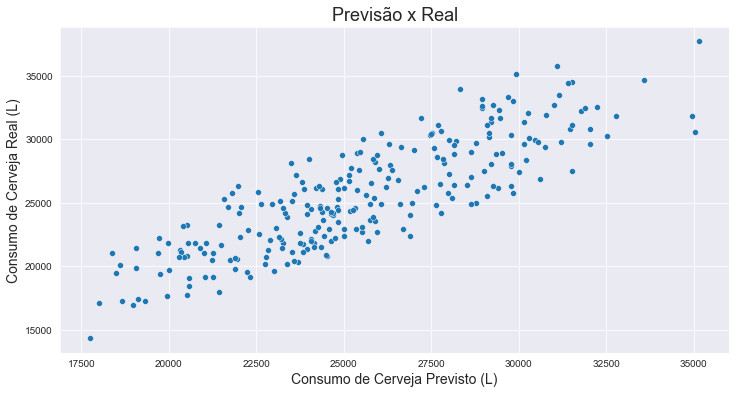

In [19]:
# Scatterplot 
ax = sns.scatterplot(x=y_pred_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja Previsto (L)', fontsize=14)
ax.set_ylabel('Consumo de Cerveja Real (L)', fontsize=14)
ax

## Gráfico de Dispersão (Valor Estimado x Resíduo)

Resíduo é o valor que não foi capaz de ser explicado pelo modelo (variáveis explicativas). É possível analisar a homocedrasticidade do modelo de forma gráfica, plotando-se a previsão versus o resíduo. 

<AxesSubplot:title={'center':'Previsão x Resíduo'}, xlabel='Consumo de Cerveja Previsto (L)', ylabel='Resíduo'>

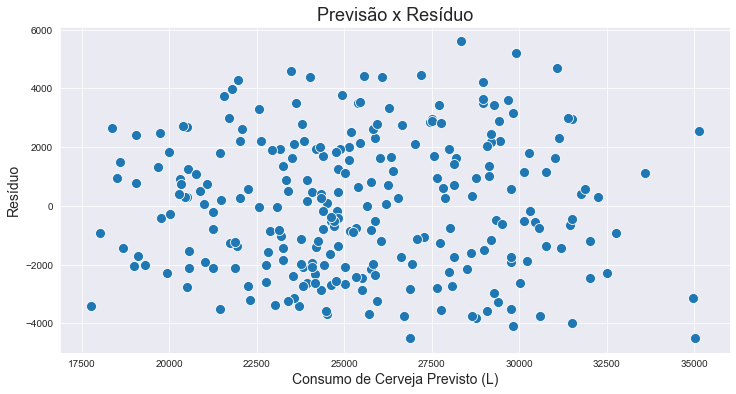

In [20]:
# Obtendo Resíduo
residuo = y_train - y_pred_train

# Scatterplot 
ax = sns.scatterplot(x=y_pred_train, y=residuo, s=100)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduo', fontsize=18)
ax.set_xlabel('Consumo de Cerveja Previsto (L)', fontsize=14)
ax.set_ylabel('Resíduo', fontsize=14)
ax

Conforme é explicado na imagem abaixo, elevando o resíduo ao quadrado podemos analisar se o modelo apresenta heterocedasticidade caso ele apresente um comportamento semelhante aos exemplos 2, 3, 4 e 5. Aparentemente, o modelo apresenta heterocedasticidade pois o gráfico abaixo apresenta o comportamento de cone, semelhante ao exemplo 2 da imagem.

<img width='800px' src='../Dados/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<AxesSubplot:title={'center':'Previsão x Resíduo'}, xlabel='Consumo de Cerveja Previsto (L)', ylabel='Resíduo²'>

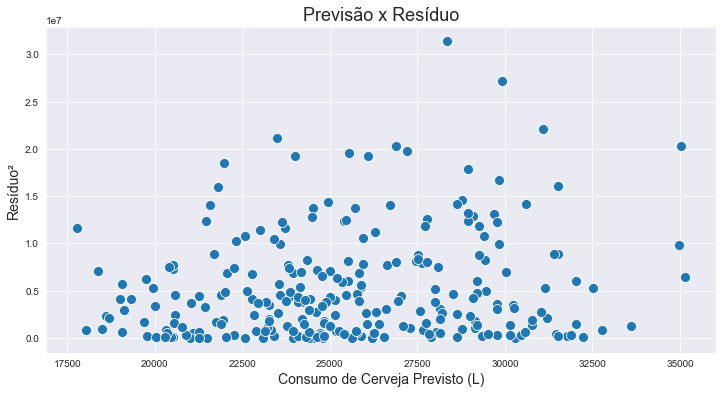

In [21]:
# Scatterplot Resíduos ao quadrado
ax = sns.scatterplot(x=y_pred_train, y=residuo**2, s=100)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduo', fontsize=18)
ax.set_xlabel('Consumo de Cerveja Previsto (L)', fontsize=14)
ax.set_ylabel('Resíduo²', fontsize=14)
ax

Avaliando a curva normal da distribuição de frequência dos residuos, nota-se que ela apresenta uma deformidade. Ou seja, não há uma constância na frequência, o que explica a heterocedasticidade no modelo.

Text(0.5, 0, 'Litros')

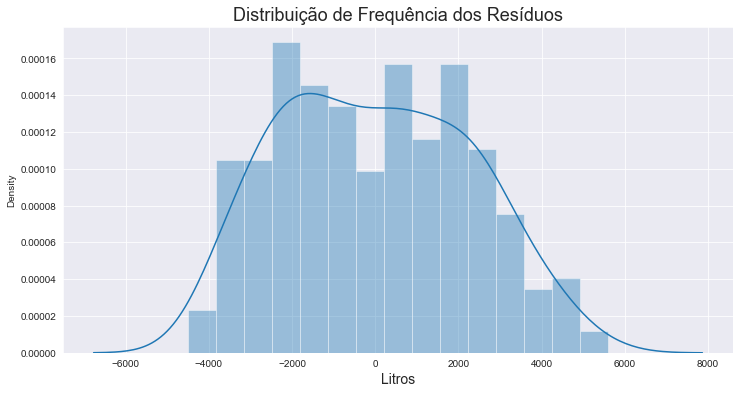

In [22]:
# Distribuição de Frequência dos Resíduos
ax = sns.distplot(residuo, bins=15)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)

# Comparando modelos
---

## Utilizando a Temperatura Média em vez de Temperatura Máxima

### Criando o novo modelo

In [23]:
# Dados Utilizados
X2 = dados[['temp_media', 'chuva', 'fds']]

In [24]:
# Criando os datasets de treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3)

In [25]:
# Instanciando o LinearRegression()
modelo_2 = LinearRegression()

# Ajuste do Modelo
modelo_2.fit(X2_train, y2_train)

LinearRegression()

### Comparação entre os modelos

Analisando os Coeficientes de Determinação (R²) podemos afirmar que o primeiro modelo, que utiliza a temperatura máxima como variável explicativa, apresenta um desempenho melhor do que o modelo que utiliza a temperatura média.

In [26]:
# Coeficiente de Determinação R² do modelo que utiliza temperatura máxima
print(f'Modelo utilizando Temperatura Máxima (Treinamento)\n'
      f'R² = {modelo.score(X_train, y_train).round(2)}\n')

# Coeficiente de Determinação R² do modelo que utiliza temperatura média
print(f'Modelo utilizando Temperatura Média (Treinamento)\n'
      f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo utilizando Temperatura Máxima (Treinamento)
R² = 0.72

Modelo utilizando Temperatura Média (Treinamento)
R² = 0.65


In [27]:
# Teste de ambos os modelos
y_pred = modelo.predict(X_test)
y_pred_2 = modelo_2.predict(X2_test)

In [28]:
# Coeficiente de Determinação R² do modelo que utiliza temperatura máxima
print(f'Modelo utilizando Temperatura Máxima (Teste)\n'
      f'R² = {metrics.r2_score(y_test, y_pred).round(2)}\n')

# Coeficiente de Determinação R² do modelo que utiliza temperatura média
print(f'Modelo utilizando Temperatura Média (Teste)\n'
      f'R² = {metrics.r2_score(y2_test, y_pred_2).round(2)}')

Modelo utilizando Temperatura Máxima (Teste)
R² = 0.72

Modelo utilizando Temperatura Média (Teste)
R² = 0.68


# Salvando o Modelo
---

In [31]:
# Utilizando o Pickle para salvar o modelo
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

In [32]:
# Para importar o modelo basta
arq_modelo = open('modelo_consumo_cerveja', 'rb')
modelo = pickle.load(arq_modelo)
arq_modelo.close()

In [34]:
# Testando
print('{0:.2f} litros' .format(modelo.predict([[20.2, 12.3, 1]])[0]))

24515.28 litros
